In [2]:
import pandas as pd

# Load data
transactions = pd.read_csv('transactions.csv')
products = pd.read_csv('products.csv')
households = pd.read_csv('households.csv')

# Merge transactions with products
merged_data = pd.merge(transactions, products, on='Product_num', how='left')

# Merge with households
merged_data = pd.merge(merged_data, households, on='Hshd_num', how='left')


In [2]:
merged_data

,Basket_num,Hshd_num,Purchase_date,Product_num,Spend,Units,Store_r,Week_num,Year,Department,...,Brand_ty,Natural_organic_flag,Loyalty,Age_range,Marital,Income_range,Homeowner,Hshd_composition,HH_size,Children
0,66618,1618,2020-02-18,204145,2.98,2,WEST,7,2020,FOOD,...,NATIONAL,N,N,55-64,Married,100-150K,Homeowner,2 Adults,2,NaN
1,66641,2639,2020-02-18,163249,2.29,1,WEST,7,2020,FOOD,...,NATIONAL,N,Y,45-54,Married,75-99K,Homeowner,2 Adults and Kids,4,2
2,66704,3186,2020-02-18,90473,1.58,2,CENTRAL,7,2020,FOOD,...,PRIVATE,N,Y,55-64,Married,150K+,Homeowner,2 Adults,2,NaN
3,66710,151,2020-02-18,8831,2.50,1,EAST,7,2020,FOOD,...,NATIONAL,N,N,45-54,Single,150K+,Homeowner,1 Adult,1,NaN
4,66731,2442,2020-02-18,3786819,2.00,2,WEST,7,2020,NON-FOOD,...,PRIVATE,N,Y,65-74,Single,35-49K,Homeowner,Single Female,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922003,66524,4836,2020-02-16,4147083,2.00,1,SOUTH,7,2020,FOOD,...,NATIONAL,N,Y,NaN,null,NaN,null,null,NaN,NaN
922004,66526,4183,2020-02-16,5129042,2.00,1,WEST,7,2020,FOOD,...,NATIONAL,N,Y,35-44,Married,75-99K,Homeowner,2 Adults and Kids,4,2
922005,66531,1554,2020-02-16,986055,1.00,1,EAST,7,2020,FOOD,...,NATIONAL,N,Y,75+,Single,UNDER 35K,Homeowner,1 Adult,1,NaN
922006,66555,4214,2020-02-17,99576,0.69,1,CENTRAL,7,2020,FOOD,...,PRIVATE,N,Y,19-24,Single,50-74K,Renter,1 Adult,1,NaN


In [ ]:
import pandas as pd

product_popularity = transactions['Product_num'].value_counts()

product_popularity_df = product_popularity.reset_index()
product_popularity_df.columns = ['Product_num', 'Frequency']

print("Most Popular Products:")
print(product_popularity_df.head(25))

Most Popular Products:
    Product_num  Frequency
0          8436       4909
1         84775       3124
2         88715       2777
3       3781030       2687
4          8487       2309
5         88731       2254
6          8512       1976
7         84666       1957
8       1023718       1800
9       2267712       1794
10         8490       1534
11         7592       1474
12        85355       1401
13        84814       1376
14        84759       1375
15         8492       1343
16       100940       1317
17        96157       1264
18        93161       1135
19        97584       1117
20      5107273       1112
21      5229522       1057
22      6441562       1037
23       442202       1035
24         8588       1034


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd


# Top 25 products
top_25_products = product_popularity_df.head(75)['Product_num'].tolist()

# Create binary columns for top 25 products
for product in top_25_products:
    transactions[f'product_{product}'] = (transactions['Product_num'] == product).astype(int)

# basket level
basket_features = transactions.groupby('Basket_num').sum()

# target baskets with spend over 200
basket_features['product_target'] = (basket_features['Spend'] > 100).astype(int)

X = basket_features[[f'product_{product}' for product in top_25_products]]
y = (basket_features['product_target'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_preds))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_test)[:, 1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_preds))

# Gradient Boosting
gbm = XGBClassifier()
gbm.fit(X_train, y_train)
gbm_preds = gbm.predict_proba(X_test)[:, 1]
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gbm_preds))


/tmp/ipykernel_3000/3376056739.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  basket_features['product_target'] = (basket_features['Spend'] > 100).astype(int)


Logistic Regression ROC-AUC: 0.8433021693993917
Random Forest ROC-AUC: 0.8158230080583698
Gradient Boosting ROC-AUC: 0.8459568013300507


# **Findings from Model Evaluation**

## **Model Performance**
The three machine learning models were evaluated for their ability to predict high-spending baskets (`Spend > $100`) based on the presence of the top 75 products. The results, measured by ROC-AUC, are as follows:

| **Model**              | **ROC-AUC Score** |
|-------------------------|-------------------|
| Logistic Regression     | 0.843            |
| Random Forest           | 0.816            |
| Gradient Boosting (XGB) | 0.846            |

### **Key Findings**
1. **Gradient Boosting (XGB)**:
   - Achieved the highest ROC-AUC score (**0.846**).
   - Demonstrated the best ability to capture complex relationships in the data, making it the most suitable model for this task.

2. **Logistic Regression**:
   - Performed almost as well as Gradient Boosting, with an ROC-AUC score of **0.843**.
   - The strong performance indicates that the relationship between the top products and high spending is largely linear.

3. **Random Forest**:
   - Scored **0.816** on ROC-AUC, underperforming relative to the other models.
   - While it captured some non-linear relationships, it was less effective than Gradient Boosting in distinguishing high-spending baskets.

### **Comparison of Models**
- Gradient Boosting provided the most accurate predictions, but Logistic Regression was a close second, indicating that linear patterns play a significant role.
- Random Forest, while effective, struggled compared to the other models, likely due to insufficient complexity or parameter tuning.

### **Conclusions**
- **Gradient Boosting** is the preferred model for predicting high-spending baskets.
- The strong performance of Logistic Regression suggests that simple, interpretable models can also be effective for this type of analysis.


Top Products Driving the Target Outcome:
            Product  Importance
11     product_7592    0.027878
5     product_88731    0.026931
0      product_8436    0.026623
4      product_8487    0.025986
3   product_3781030    0.024365
1     product_84775    0.022848
16   product_100940    0.021796
2     product_88715    0.020694
15     product_8492    0.020345
8   product_1023718    0.020132


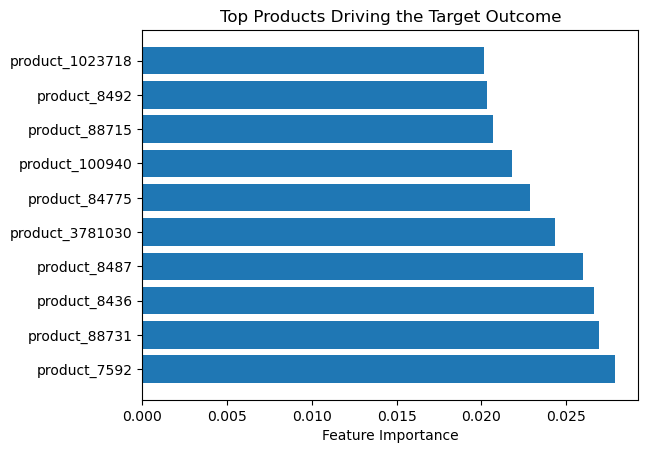

In [29]:
# Get feature importance from Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Product': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 10 product combinations
print("Top Products Driving the Target Outcome:")
print(feature_importance.head(10))

# Plot feature importance
plt.barh(feature_importance['Product'].head(10), feature_importance['Importance'].head(10))
plt.xlabel('Feature Importance')
plt.title('Top Products Driving the Target Outcome')
plt.show()


# **Findings from Feature Importance Analysis**

## **Key Results**
The Random Forest model was used to identify the top products driving predictions for high-spending baskets. Feature importance scores were calculated, and the top 10 products with the highest influence are listed below.

| **Rank** | **Product**       | **Importance** |
|----------|--------------------|----------------|
| 1        | product_7592       | 0.027878       |
| 2        | product_88731      | 0.026931       |
| 3        | product_8436       | 0.026623       |
| 4        | product_8487       | 0.025986       |
| 5        | product_3781030    | 0.024365       |
| 6        | product_84775      | 0.022848       |
| 7        | product_100940     | 0.021796       |
| 8        | product_88715      | 0.020694       |
| 9        | product_8492       | 0.020345       |
| 10       | product_1023718    | 0.020132       |

### **Key Findings**
1. **Top Driver**:
   - **Product 7592** has the highest importance score (0.027878), making it the strongest driver of predictions for high-spending baskets.

2. **Other Significant Products**:
   - Products like **88731**, **8436**, and **8487** also have high importance scores, indicating their strong influence on the target outcome.

3. **Distribution of Influence**:
   - The importance scores suggest that a small number of products have a disproportionate impact on model predictions, while others contribute less significantly.

### **Visualization**
- A horizontal bar chart was generated to visualize the top 10 products and their importance scores.
- This visualization provides a clear view of which products most influence the model.

### **Conclusions**
- The identified products should be prioritized for cross-selling and promotional efforts.


In [19]:
# Get predicted probabilities
probabilities = gbm.predict_proba(X_test)[:, 1]

# Combine with test data
predicted_df = X_test.copy()
predicted_df['Predicted_Probability'] = probabilities

# Identify baskets with high purchase probabilities
high_likelihood_baskets = predicted_df[predicted_df['Predicted_Probability'] > 0.8]
print("Baskets with High Likelihood of Purchase:")
print(high_likelihood_baskets.head())


Baskets with High Likelihood of Purchase:
            product_8436  product_84775  product_88715  product_3781030  \
Basket_num                                                                
30261                  1              0              0                0   
73423                  1              0              0                0   
74314                  0              1              0                0   
46536                  0              0              1                0   
41660                  0              0              1                0   

            product_8487  product_88731  product_8512  product_84666  \
Basket_num                                                             
30261                  0              0             0              0   
73423                  0              0             0              0   
74314                  0              0             0              0   
46536                  0              0             1              0   


# **Findings from Predicted Probabilities Analysis**

## **Key Results**
The Gradient Boosting model (XGB) was used to predict the likelihood of high-spending baskets (`Spend > $100`). Baskets with a predicted probability greater than 0.8 were identified as high likelihood. The results are summarized below:

### **Baskets with High Likelihood of Purchase**
| **Basket ID** | **Predicted Probability** | **Top Products Present** |
|---------------|----------------------------|---------------------------|
| 30261         | 0.846260                  | product_8436              |
| 73423         | 0.942603                  | product_8436              |
| 74314         | 0.982020                  | product_84775, product_6786863 |
| 46536         | 0.932327                  | product_88715, product_1023718, product_6786863 |
| 41660         | 0.980922                  | product_88715, product_8487 |

### **Key Findings**
1. **High-Likelihood Baskets**:
   - The Gradient Boosting model identified multiple baskets with probabilities exceeding 80%, indicating a high likelihood of being high-spending baskets.

2. **Top Products Driving Predictions**:
   - Products such as **product_8436**, **product_84775**, and **product_88715** frequently appear in high-likelihood baskets, reinforcing their influence on the target outcome.

3. **Diverse Product Combinations**:
   - Different baskets exhibit distinct combinations of top products, suggesting opportunities for tailored cross-selling strategies.

### **Conclusions**
- **High-Impact Baskets**:
  - These identified baskets should be prioritized for promotions or targeted marketing campaigns, focusing on their associated products.

- **Product-Level Insights**:
  - Frequently occurring products in high-likelihood baskets can inform inventory management and bundling strategies.

- **Actionable Opportunities**:
  - Utilize these predictions to personalize recommendations, optimize product placement, and increase customer engagement.


In [21]:
# Example: Target cross-sell opportunities
top_cross_selling = feature_importance.head(5)
print("Top Products for Cross-Selling:")
print(top_cross_selling)


Top Products for Cross-Selling:
            Product  Importance
11     product_7592    0.027878
5     product_88731    0.026931
0      product_8436    0.026623
4      product_8487    0.025986
3   product_3781030    0.024365


# **Findings from Cross-Selling Opportunities Analysis**

## **Top Products for Cross-Selling**
The Random Forest model was used to identify the top products with the highest influence on predicting high-spending baskets (`Spend > $100`). These products are ideal candidates for cross-selling opportunities:

| **Rank** | **Product**       | **Importance** |
|----------|--------------------|----------------|
| 1        | product_7592       | 0.027878       |
| 2        | product_88731      | 0.026931       |
| 3        | product_8436       | 0.026623       |
| 4        | product_8487       | 0.025986       |
| 5        | product_3781030    | 0.024365       |

### **Key Findings**
1. **Top Driver for Cross-Selling**:
   - **Product 7592** has the highest importance score (0.027878), making it the most influential product for targeting cross-sell opportunities.

2. **Strong Supporting Products**:
   - Products such as **88731**, **8436**, and **8487** also have high importance scores, demonstrating their potential to drive customer engagement and sales.

3. **Opportunities for Bundling**:
   - These top products are strong candidates for creating product bundles or promoting together to maximize revenue.

### **Conclusions**
- **Cross-Sell Strategy**:
  - Focus marketing efforts on **product 7592** and the other top products to enhance cross-selling effectiveness.

- **Bundling Potential**:
  - Consider creating bundles or offering discounts on combinations of these high-impact products to increase basket size.

- **Customer Targeting**:
  - Use these insights to identify and target customers most likely to purchase these products, improving overall sales performance.
